**Exercise 22.1**

Write a code for the wave equation using the FTCS scheme (22.3). As in the previous chapter, use mass per unit length µ = 0.01 and
tension T = 25.0 (in SI units), so the wave speed is c = 50.0. Set the boundaries at $x_a$ = -5.0 and $x_b$ = 5.0. For initial conditions, use the Gaussian pulse at rest. That is, $y_j^0$ is given by Eq 21.12 and $v_j^0$ = 0. Experiment with different timestep values. Have your code display a graph of y(x) showing the unphysical results.

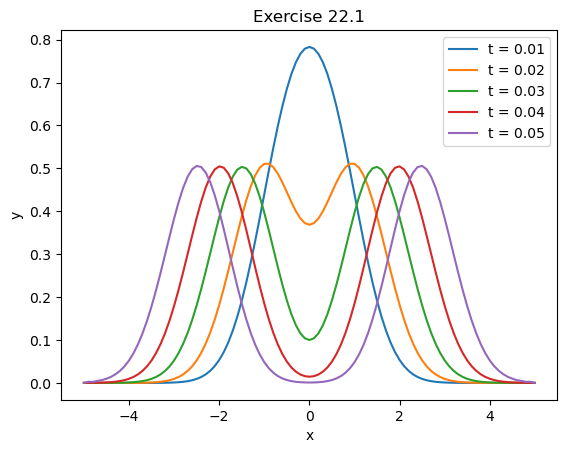

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
xa = -5.0
xb = 5.0
mu = 0.01
T = 25.0
c = np.sqrt(T / mu)
J = 100        # number of spatial intervals
N = 500        # number of timesteps

dx = (xb - xa) / J
dt = 0.05 * dx / c 

x = np.linspace(xa, xb, J + 1)

# Define arrays
y  = np.zeros(J + 1)  
v  = np.zeros(J + 1)   
yp = np.zeros(J + 1)   
vp = np.zeros(J + 1)   

# Initial condition
A = 1
sigma = 1
y0 = A * np.exp(-(x**2) / sigma**2)

y = np.copy(y0)
v = np.zeros_like(y0)     

# FTCS
for n in range(1, N + 1):

    for j in range(1, J):
        y_x = (y[j+1] - y[j-1]) / (2 * dx)
        v_x = (v[j+1] - v[j-1]) / (2 * dx)

        vp[j] = v[j] + dt * y_x
        yp[j] = y[j] + dt * c**2 * v_x

    # boundary conditions
    yp[0] = y[0]
    yp[J] = y[J]
    vp[0] = v[0]
    vp[J] = v[J]

    y = np.copy(yp)
    v = np.copy(vp)

    # Plot occasionally
    if n % 100 == 0:
        plt.plot(x, y, label=f"t = {n*dt:.2f}")

# Final plot
plt.title("Exercise 22.1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


**Exercise 22.2a**

Solve the wave equation based on the LF algorithm. Use the same initial data as in the previous exercise. Choose a relatively small
timestep so that the simulation is stable. Plot y versus x at various times. 

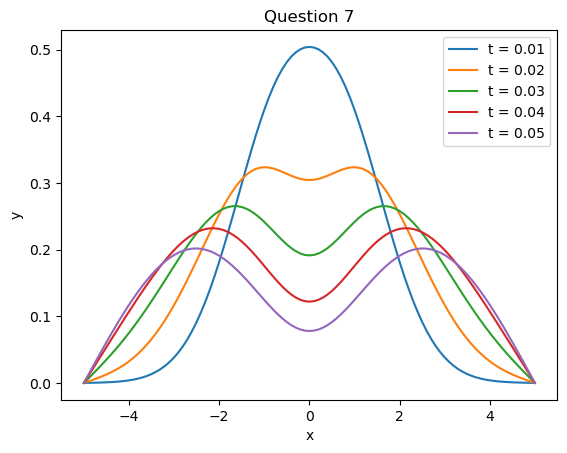

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
xa = -5.0
xb = 5.0
mu = 0.01
T = 25.0
c = np.sqrt(T / mu)
J = 100        # number of spatial intervals
N = 500        # number of timesteps

dx = (xb - xa) / J
dt = 0.05 * dx / c 

x = np.linspace(xa, xb, J+1)

# Define arrays
y  = np.zeros(J+1)   
v  = np.zeros(J+1)   
yp = np.zeros(J+1)   
vp = np.zeros(J+1)  

# Initial conditions
A = 1
sigma = 1
y0 = A * np.exp(-(x**2) / sigma**2)

y = np.copy(y0)
v = np.zeros(J+1)

# Time loop
for n in range(1, N+1):

    for j in range(1, J):
        yp[j] = 0.5 * (y[j+1] + y[j-1]) + dt * v[j]
        vp[j] = v[j] + dt * c**2 * (y[j+1] - 2.0*y[j] + y[j-1]) / dx**2

    # Boundary conditions
    yp[0] = y[0]
    yp[J] = y[J]
    vp[0] = v[0]
    vp[J] = v[J]

    y = np.copy(yp)
    v = np.copy(vp)

    if n % 100 == 0:
        plt.plot(x, y, label=f"t = {n*dt:.2f}")

# Final plot
plt.title("Exercise 22.2a")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


**Exercise 22.3**

Compute the energy at the end of each timestep in your LF code. Plot the energy as a function of time.

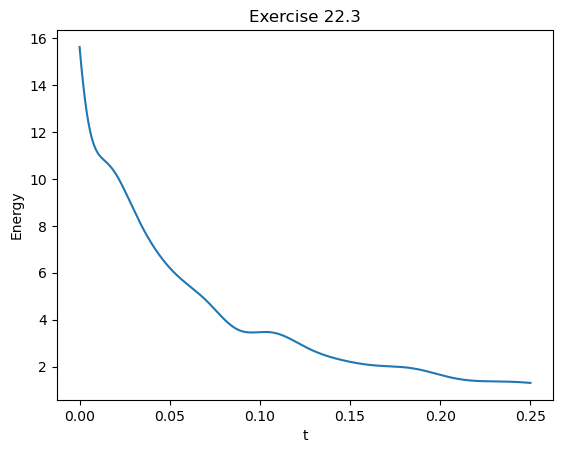

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
xa = -5.0
xb = 5.0
mu = 0.01
T = 25.0
c = np.sqrt(T / mu)
J = 100        # number of spatial intervals
N = 500        # number of timesteps

dx = (xb - xa) / J
dt = 0.25 * dx / c 

x = np.linspace(xa, xb, J+1)

# Define arrays
y  = np.zeros(J+1)   
v  = np.zeros(J+1)   
yp = np.zeros(J+1)   
vp = np.zeros(J+1)  

# Initial conditions
A = 1
sigma = 1
y0 = A * np.exp(-(x**2) / sigma**2)

y = np.copy(y0)
v = np.zeros(J+1)

energy = []
time = []

# Eq 22.10
def energy_func(y, v, dx, mu, T):
    v_mid = 0.5 * (v[:-1] + v[1:])
    dy = (y[1:] - y[:-1]) / dx
    E = 0.5 * np.sum(dx * (mu * v_mid**2 + T * dy**2))
    return E

# initial energy
energy.append(energy_func(y, v, dx, mu, T))
time.append(0.0)

# Time loop
for n in range(1, N+1):

    for j in range(1, J):
        yp[j] = 0.5 * (y[j+1] + y[j-1]) + dt * v[j]
        vp[j] = v[j] + dt * c**2 * (y[j+1] - 2.0*y[j] + y[j-1]) / dx**2

    # Boundary conditions
    yp[0] = y[0]
    yp[J] = y[J]
    vp[0] = v[0]
    vp[J] = v[J]

    y = np.copy(yp)
    v = np.copy(vp)

    energy.append(energy_func(y, v, dx, mu, T))
    time.append(n * dt)

# Plot
plt.figure()
plt.plot(time, energy)
plt.xlabel("t")
plt.ylabel("Energy")
plt.title("Exercise 22.3")
plt.show()


**Exercise 22.4a**

Carry out the three–point convergence test with $x_a$ = 5, $x_b$ = 5, and c = 50. Set the timestep to t = 0.25$\triangle$x/c and use the time interval 0 $\leq$ t $\leq$ 0.25. For initial conditions, use the Gaussian pulse at rest. Determine $E_{(J)}$ for resolution J = 100, 200, 400, etc. Does the left–hand side of Eq. (22.12) approach 2 in the limit of high resolution?

ANSWER: No, the left-hand side of Eq 22.12 does not approach 2 at high resolutions (or at least for the resolutions provided by the exercise). 

In [53]:
import numpy as np

# Parameters
xa = -5.0
xb = 5.0
mu = 0.01
T = 25.0
c = 50.0
A = 1
sigma = 1
final_time = 0.25

# Energy formula (Eq 22.10)
def energy_func(y, v, dx, mu, T):
    v_mid = 0.5 * (v[:-1] + v[1:])
    dy = (y[1:] - y[:-1]) / dx
    E = 0.5 * np.sum(dx * (mu * v_mid**2 + T * dy**2))
    return E

def run(J):
    dx = (xb - xa) / J
    dt = 0.25 * dx / c
    N = int(final_time / dt)

    x = np.linspace(xa, xb, J+1)

    y  = np.zeros(J+1)
    v  = np.zeros(J+1)
    yp = np.zeros(J+1)
    vp = np.zeros(J+1)

    # Initial conditions
    y0 = A * np.exp(-(x**2) / sigma**2)
    y = np.copy(y0)
    v = np.zeros(J+1)

    # Time loop
    for n in range(1, N+1):
        for j in range(1, J):
            yp[j] = 0.5 * (y[j+1] + y[j-1]) + dt * v[j]
            vp[j] = v[j] + dt * c**2 * (y[j+1] - 2.0*y[j] + y[j-1]) / dx**2

        # boundary conditions
        yp[0] = y[0]
        yp[J] = y[J]
        vp[0] = v[0]
        vp[J] = v[J]

        y = np.copy(yp)
        v = np.copy(vp)

    return energy_func(y, v, dx, mu, T)


E100 = run(100)
E200 = run(200)
E400 = run(400)

# Eq 22.12
ratio = (E100 - E200) / (E200 - E400)

# print("E100 =", E100)
# print("E200 =", E200)
# print("E400 =", E400)
print("Convergence:", ratio)


Convergence: 0.6256143352927482


**Exercise 22.4b**

Solve the wave equation using the method of lines with fourth–order Runge–Kutta. Plot the energy as a function of time. How do these results compare to the results you obtained with the LF method?

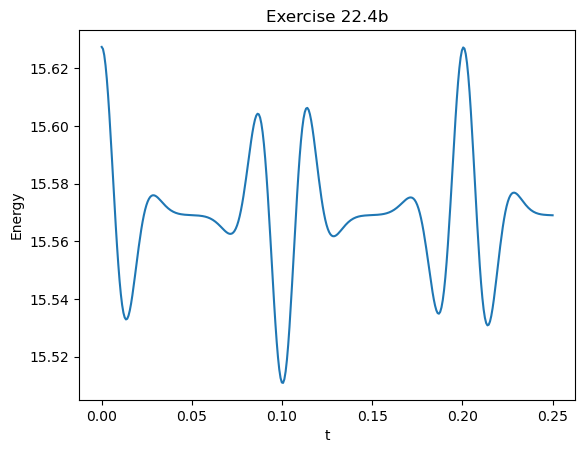

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters 
xa = -5.0
xb = 5.0
mu = 0.01
T = 25.0
c = np.sqrt(T / mu)
A = 1.0
sigma = 1.0
final_time = 0.25

# Eq. 22.10
def energy(y, v, dx):
    v_mid = 0.5 * (v[:-1] + v[1:])
    dy = (y[1:] - y[:-1]) / dx
    return 0.5 * np.sum(dx * (mu * v_mid**2 + T * dy**2))

# Eq. 22.13
def rhs(y, v, dx):
    J = len(y) - 1
    dy_dt = np.zeros_like(y)
    dv_dt = np.zeros_like(v)

    for j in range(1, J):
        dy_dt[j] = v[j]
        dv_dt[j] = c**2 * (y[j+1] - 2 * y[j] + y[j-1]) / dx**2

    return dy_dt, dv_dt

# Textbook code - RK4 code taken from ODEs-II
def solve(J):
    dx = (xb - xa) / J
    dt = dx / (2 * np.sqrt(2) * c)
    N = int(final_time / dt)
    dt = final_time / N

    x = np.linspace(xa, xb, J+1)
    y = A * np.exp(-(x**2) / sigma ** 2)
    v = np.zeros(J+1)

    times = [0.0]
    energies = [energy(y, v, dx)]

    for n in range(N):

        # RK4 steps
        k1y, k1v = rhs(y, v, dx)

        y2 = y + 0.5 * dt * k1y
        v2 = v + 0.5 * dt * k1v
        k2y, k2v = rhs(y2, v2, dx)

        y3 = y + 0.5 * dt * k2y
        v3 = v + 0.5 * dt * k2v
        k3y, k3v = rhs(y3, v3, dx)

        y4 = y + dt * k3y
        v4 = v + dt * k3v
        k4y, k4v = rhs(y4, v4, dx)

        y += (dt/6) * (k1y + 2*k2y + 2*k3y + k4y)
        v += (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)

        y[0] = 0.0
        y[-1] = 0.0
        v[0] = 0.0
        v[-1] = 0.0

        times.append((n+1) * dt)
        energies.append(energy(y, v, dx))

    return np.array(times), np.array(energies)


J = 100
times, energies = solve(J)

plt.plot(times, energies)
plt.xlabel("t")
plt.ylabel("Energy")
plt.title("Exercise 22.4b")
plt.show()

**Exercise 22.5a**

Use the method of lines with RK4 to solve the wave equation with initial conditions, 

y(0, x) = 2 sin(2$\pi$(x - $x_a$)/($x_b$ - $x_a$)) + sin($5\pi$(x - $x_a$)/($x_b$ - $x_a$)),

v(0, x) = 20 sin(3$\pi$(x - $x_a$)/($x_b$ - $x_a$))

Experiment with other initial conditions.

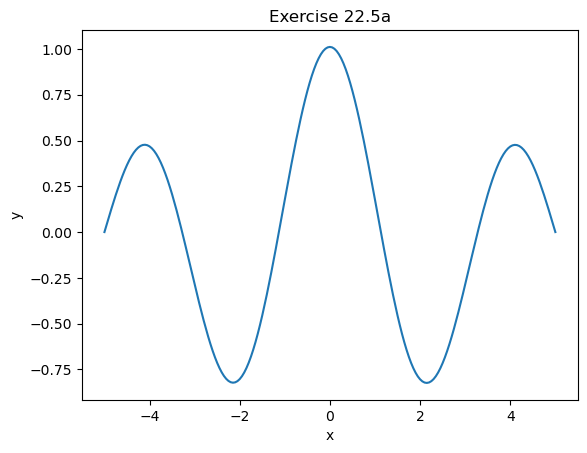

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters 
xa = -5.0
xb =  5.0
mu = 0.01
T  = 25.0
c  = np.sqrt(T / mu)
final_time = 0.25


# Energy function
def energy(y, v, dx):
    v_mid = 0.5 * (v[:-1] + v[1:])
    dy = (y[1:] - y[:-1]) / dx
    return 0.5 * np.sum(dx * (mu * v_mid**2 + T * dy**2))

# Right-hand side (Eqs. 22.13)
def rhs(y, v, dx):
    J = len(y) - 1
    dy_dt = np.zeros_like(y)
    dv_dt = np.zeros_like(v)

    for j in range(1, J):
        dy_dt[j] = v[j]
        dv_dt[j] = c**2 * (y[j+1] - 2*y[j] + y[j-1]) / dx**2

    return dy_dt, dv_dt


def solve(J):
    dx = (xb - xa) / J
    dt = dx / (2 * np.sqrt(2) * c)    
    N = int(final_time / dt)
    dt = final_time / N               

    x = np.linspace(xa, xb, J+1)

    L = xb - xa
    y = 2 * np.sin(2 * np.pi * (x - xa) / L) + np.sin(5 * np.pi * (x - xa) / L)
    v = 20 * np.sin(3 * np.pi * (x - xa) / L)

    y[0] = y[-1] = 0.0
    v[0] = v[-1] = 0.0

    times = [0.0]
    energies = [energy(y, v, dx)]

    for n in range(N):

        k1y, k1v = rhs(y, v, dx)

        y2 = y + 0.5*dt*k1y
        v2 = v + 0.5*dt*k1v
        k2y, k2v = rhs(y2, v2, dx)

        y3 = y + 0.5*dt*k2y
        v3 = v + 0.5*dt*k2v
        k3y, k3v = rhs(y3, v3, dx)

        y4 = y + dt*k3y
        v4 = v + dt*k3v
        k4y, k4v = rhs(y4, v4, dx)

        # update
        y += (dt/6)*(k1y + 2*k2y + 2*k3y + k4y)
        v += (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)

        y[0] = y[-1] = 0.0
        v[0] = v[-1] = 0.0

        times.append((n+1)*dt)
        energies.append(energy(y, v, dx))

    return x, times, energies, y, v


# J = 200 --> Starting
J = 200
x, times, energies, y_final, v_final = solve(J)


# Plot final displacement 
plt.plot(x, y_final)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exercise 22.5a")
plt.show()
